In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install PySimpleGUI

In [2]:
#pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.8 MB/s eta 0:00:00


In [3]:
%cd /content/drive/MyDrive/deep_learning/final_project/super_resolution

/content/drive/MyDrive/deep_learning/final_project/super_resolution


In [21]:
import torch
import os
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [6]:
img1_path = 'image1.jpg'
img2_path = 'image2.jpg'
img2_mask_path = 'image2_mask.jpg'

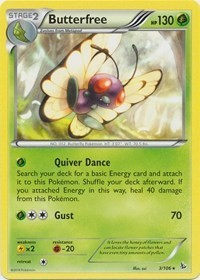

(280, 200, 3)


In [26]:
img1 = cv2.imread(img1_path , cv2.IMREAD_COLOR)
cv2_imshow(img1)
print(img1.shape)

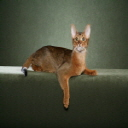

(128, 128, 3)


In [27]:
img2 = cv2.imread(img2_path , cv2.IMREAD_COLOR)
cv2_imshow(img2)
print(img2.shape)

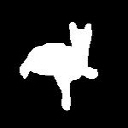

(128, 128)


In [28]:
img2_mask = cv2.imread(img2_mask_path , cv2.IMREAD_GRAYSCALE)
cv2_imshow(img2_mask)
print(img2_mask.shape)

In [31]:
model_path = '/content/drive/MyDrive/deep_learning/final_project/super_resolution/edsr-baseline-liif.pth'
#model_path = '/content/drive/MyDrive/deep_learning/final_project/rdn-liif.pth'

# super_resolution과 resize 결과 비교

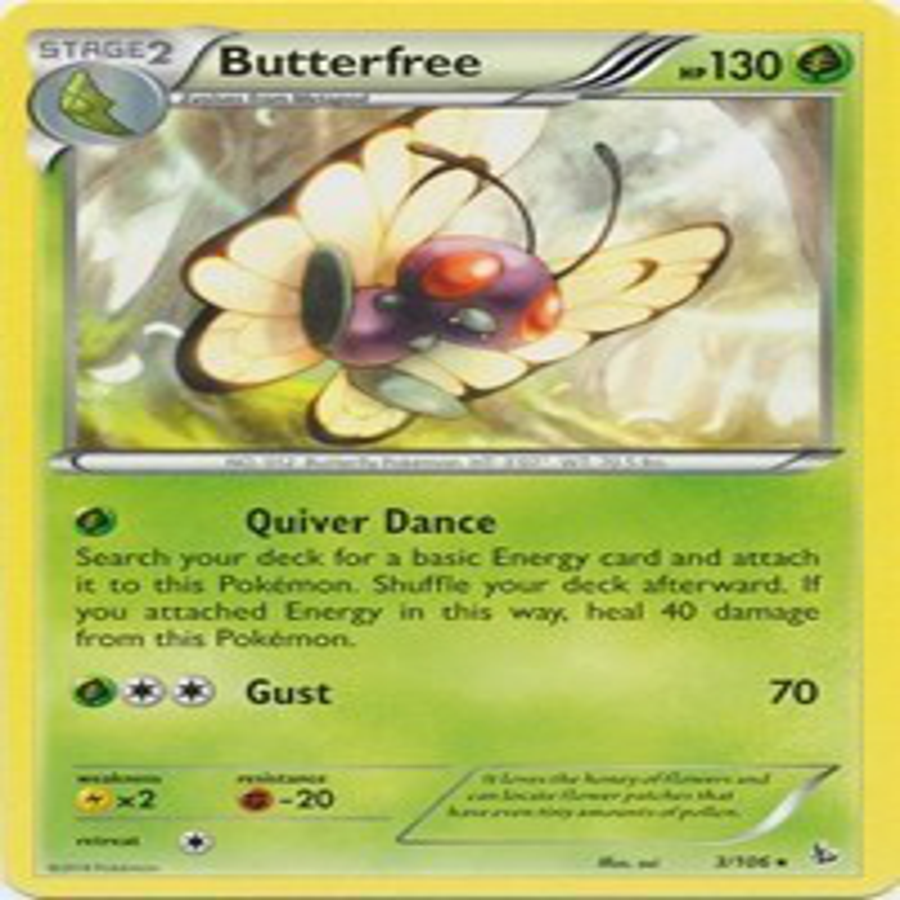

In [ ]:
img3 = img1.resize((900, 900))
img3.show()

In [ ]:
!python demo.py --input $img1_path --model $model_path --resolution 900,900 --output output2.png --gpu 0

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


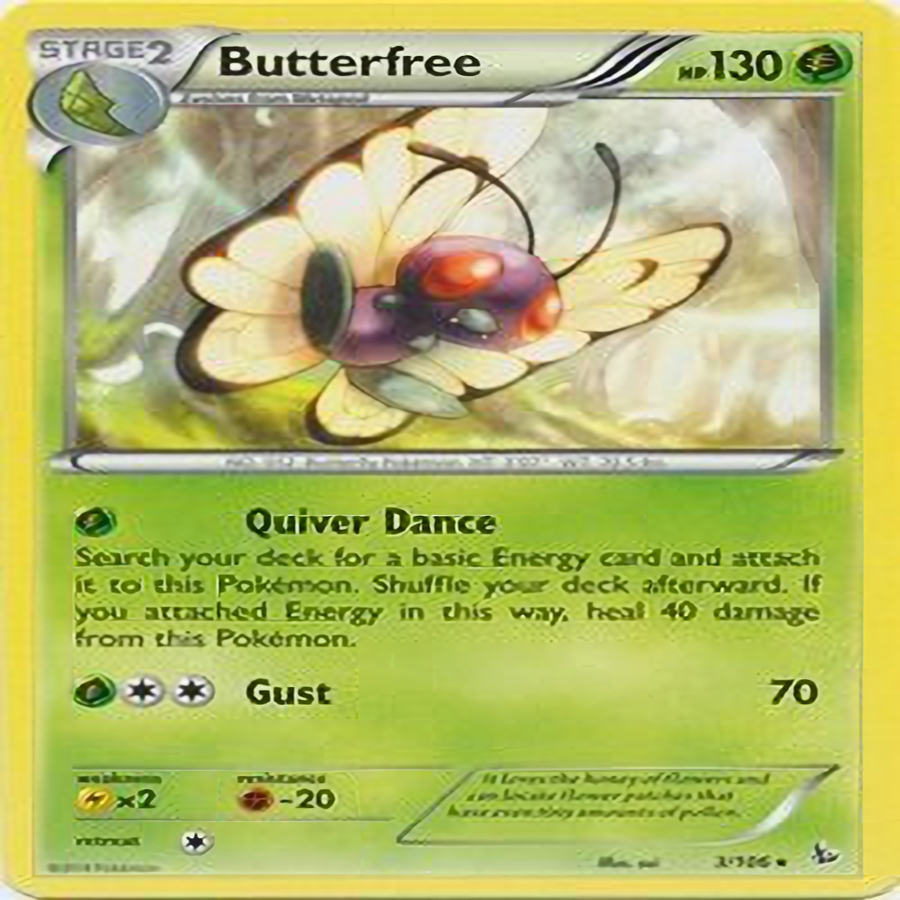

(900, 900)


In [ ]:
output_img = Image.open('/content/drive/MyDrive/deep_learning/final_project/output2.png')
output_img.show()
print(output_img.size)

# LIIF 적용 후 mask 이용해 이미지 합성

In [32]:
!python demo.py --input $img1_path --model $model_path --resolution 128,128 --output output2.png --gpu 0

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(128, 128, 3)


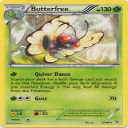

In [34]:
img1 = cv2.imread('output2.png')
print(img1.shape)
cv2_imshow(img1)

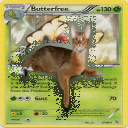

In [35]:
cv2.copyTo(img2, img2_mask, img1)
cv2_imshow(img1)